In [1]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
DATA_ROOT = '../../results'
data = {env: {} for env in os.listdir(DATA_ROOT)}

In [3]:
for env in data:
    for training in os.listdir(f'{DATA_ROOT}/{env}'):
        if training.endswith('.csv'):
            print(env, training)
            df = pd.read_csv(f'{DATA_ROOT}/{env}/{training}')
            df['hist_stats/episode_reward'] = df['hist_stats/episode_reward'].apply(lambda r: json.loads(r))
            if not 'std' in df.columns:
                df['std'] = df['hist_stats/episode_reward'].apply(np.std)
            data[env][training[:-4]] = df

humanoid ppo.csv
humanoid sac.csv
humanoid td3.csv


In [4]:
def plot_reward(df, title='', color='blue', save=False):
    """
    """    
    if title == 'humanoid-td3':
        df['episode_reward_mean'] = df['episode_reward_mean'] * 0.67
        df['std'] = df['std']*0.67
    
    df['low_std'] = df['episode_reward_mean'] - df['std']
    df['high_std'] = df['episode_reward_mean'] + df['std']
    
    plt.plot(df['timesteps_total'], df['episode_reward_mean'], c=color)
    plt.fill_between(df['timesteps_total'], df['low_std'], df['high_std'], alpha=.5, color=color)
    plt.xlabel('timestep')
    plt.ylabel('reward')
    plt.title(title)
    if save:
        fig = plt.gcf()
        fig.savefig('./plots/' + title + '.png')
    plt.show()


def plot_time(df, title='', color='blue', save=False):
    """
    """
    plt.plot(df['timesteps_total'], df['time_total_s'], c=color)
    plt.xlabel('timestep')
    plt.ylabel('time (s)')
    plt.title(title)
    if save:
        fig = plt.gcf()
        fig.savefig(title or 'untitled' + '.png')
    plt.show()
    
PALETTE = sns.color_palette()
def algorithm_color(algorithm):
    if algorithm == 'dqn':
        return PALETTE[0]
    if algorithm == 'ppo':
        return PALETTE[1]
    if 'sac' in algorithm:
        return PALETTE[4]


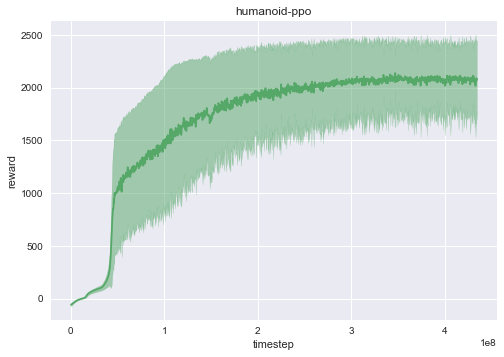

humanoid-ppo
2137.3055873027474
434169906


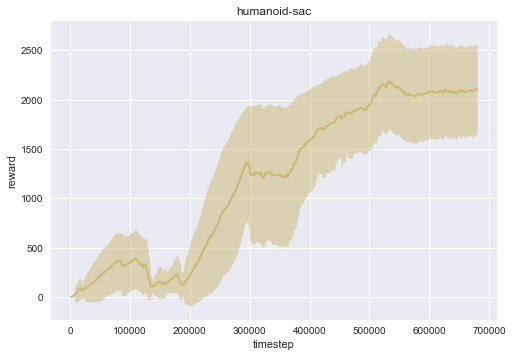

humanoid-sac
2183.7688316407734
679400


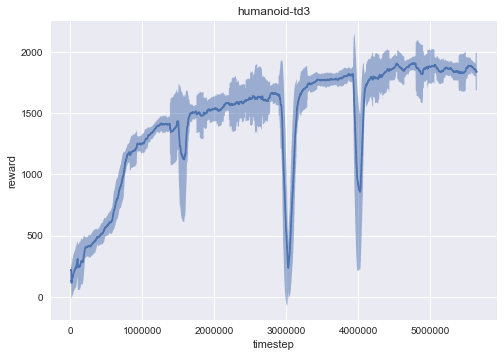

humanoid-td3
1911.369699932233
5644248


In [5]:
for env, trainings in data.items():
    for algorithm, training in trainings.items():
        title = env+'-'+algorithm
        color = algorithm_color(algorithm)
        plot_reward(training, title, color, save=True)
        print(title)
        print(training.episode_reward_mean.max())
        print(training.timesteps_total.max())
        #plot_time(training, algorithm, save=True)

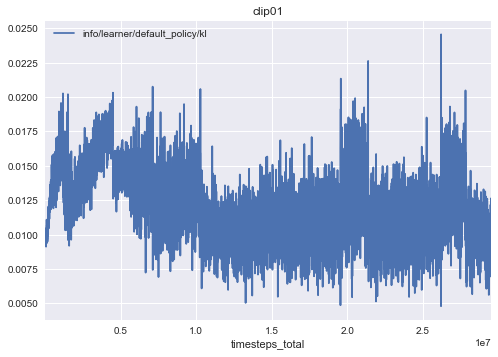

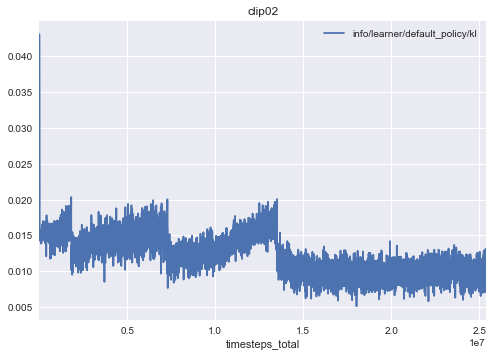

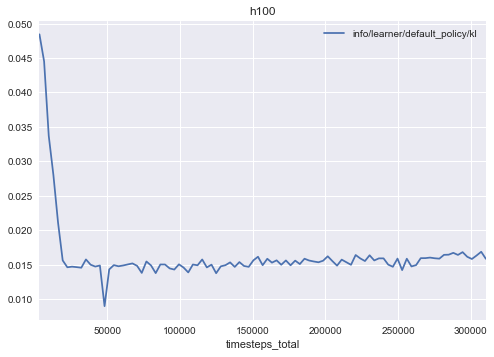

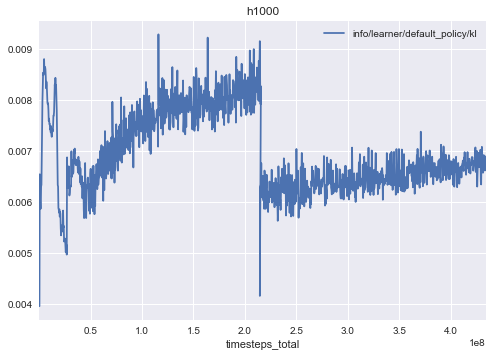

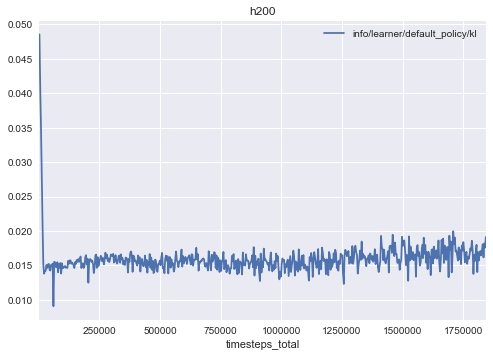

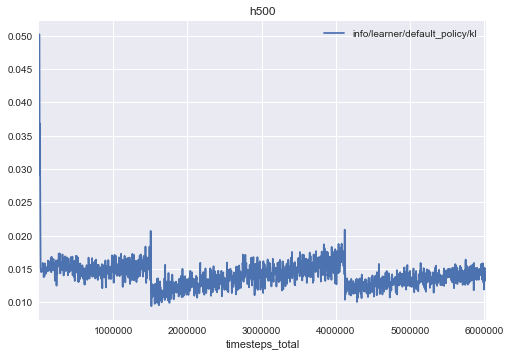

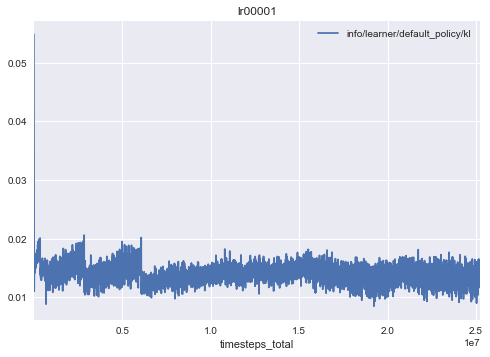

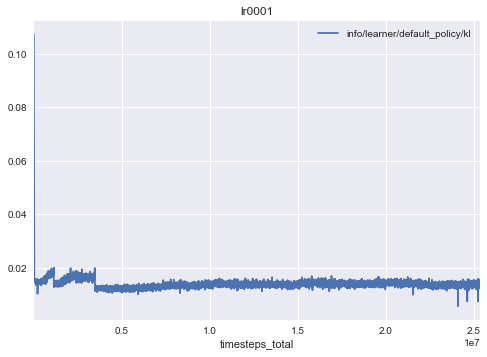

In [3]:
import os
from utils import Training
import matplotlib.pyplot as plt

data_path = '../../results/humanoid/ppo-hyp'
for training_dir in os.listdir(data_path):
    training = Training(data_path + '/' + training_dir)
    training.progress.df.plot(x='timesteps_total', y='info/learner/default_policy/kl', title=training_dir)
    plt.show()

In [16]:
import pandas as pd
from io import StringIO

root = '../../results/humanoid/'
for alg in ('td3', 'sac', 'ppo'):
    filename = root + alg + '-time.csv'
    df = pd.read_csv(filename)
    df = df[['num_workers', 'num_gpus', 'num_cpus_per_worker', 'time_this_iter_s']]
    df['speedup'] = df['time_this_iter_s'].apply(lambda t: max(df['time_this_iter_s'])/t)
    print(df.round(2).to_latex(index=False))
    

\begin{tabular}{rrrrr}
\toprule
 num\_workers &  num\_gpus &  num\_cpus\_per\_worker &  time\_this\_iter\_s &  speedup \\
\midrule
           1 &         0 &                    1 &             25.56 &     1.00 \\
           1 &         1 &                    1 &             21.69 &     1.18 \\
           2 &         0 &                    1 &             14.38 &     1.78 \\
           2 &         1 &                    1 &             11.58 &     2.21 \\
           4 &         0 &                    1 &             13.10 &     1.95 \\
           4 &         1 &                    1 &             10.09 &     2.53 \\
           8 &         0 &                    1 &              8.12 &     3.15 \\
           8 &         1 &                    1 &              6.76 &     3.78 \\
          15 &         0 &                    1 &              3.63 &     7.04 \\
          16 &         0 &                    1 &              5.20 &     4.92 \\
          16 &         1 &                    1 &